<a href="https://colab.research.google.com/github/BrouthenKamel/Machine_Learning_Project/blob/main/Heart_Attack_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [315]:
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [316]:
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


**Droping Categorical features**

In [317]:
dataset.drop("chest pain type", axis=1, inplace=True)
dataset.drop("sex", axis=1, inplace=True)
dataset.drop("ST slope", axis=1, inplace=True)

newDataset = dataset

newDataset

,age,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,target
0,40,140,289,0,0,172,0,0.0,0
1,49,160,180,0,0,156,0,1.0,1
2,37,130,283,0,1,98,0,0.0,0
3,48,138,214,0,0,108,1,1.5,1
4,54,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,0,132,0,1.2,1
1186,68,144,193,1,0,141,0,3.4,1
1187,57,130,131,0,0,115,1,1.2,1
1188,57,130,236,0,2,174,0,0.0,1


In [318]:
dataset.rename( columns = { 'target' : 'danger' } , inplace= True )
dataset

,age,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
0,40,140,289,0,0,172,0,0.0,0
1,49,160,180,0,0,156,0,1.0,1
2,37,130,283,0,1,98,0,0.0,0
3,48,138,214,0,0,108,1,1.5,1
4,54,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,0,132,0,1.2,1
1186,68,144,193,1,0,141,0,3.4,1
1187,57,130,131,0,0,115,1,1.2,1
1188,57,130,236,0,2,174,0,0.0,1


In [319]:
dataset.describe()

,age,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [320]:
dataset.rename( columns = { "resting bp s" : "resting bpm" } , inplace = True )

dataset.drop( dataset[ dataset["resting bpm"] == 0 ].index , inplace = True ) # cuz they are already dead
print("Resting Bpm corrected \n")
dataset["resting bpm"].sort_values()

Resting Bpm corrected 



315      80
228      92
834      94
694      94
1018     94
       ... 
242     200
734     200
366     200
1013    200
400     200
Name: resting bpm, Length: 1189, dtype: int64

In [321]:
dataset.describe()

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.719092,132.264929,210.540791,0.213625,0.698907,139.719933,0.387721,0.922288,0.528175
std,9.362067,17.971769,101.279280,0.410037,0.870489,25.524527,0.487435,1.086665,0.499416
min,28.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,0.000000,140.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'resting bpm'}>,
        <AxesSubplot: title={'center': 'cholesterol'}>],
       [<AxesSubplot: title={'center': 'fasting blood sugar'}>,
        <AxesSubplot: title={'center': 'resting ecg'}>,
        <AxesSubplot: title={'center': 'max heart rate'}>],
       [<AxesSubplot: title={'center': 'exercise angina'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'danger'}>]], dtype=object)

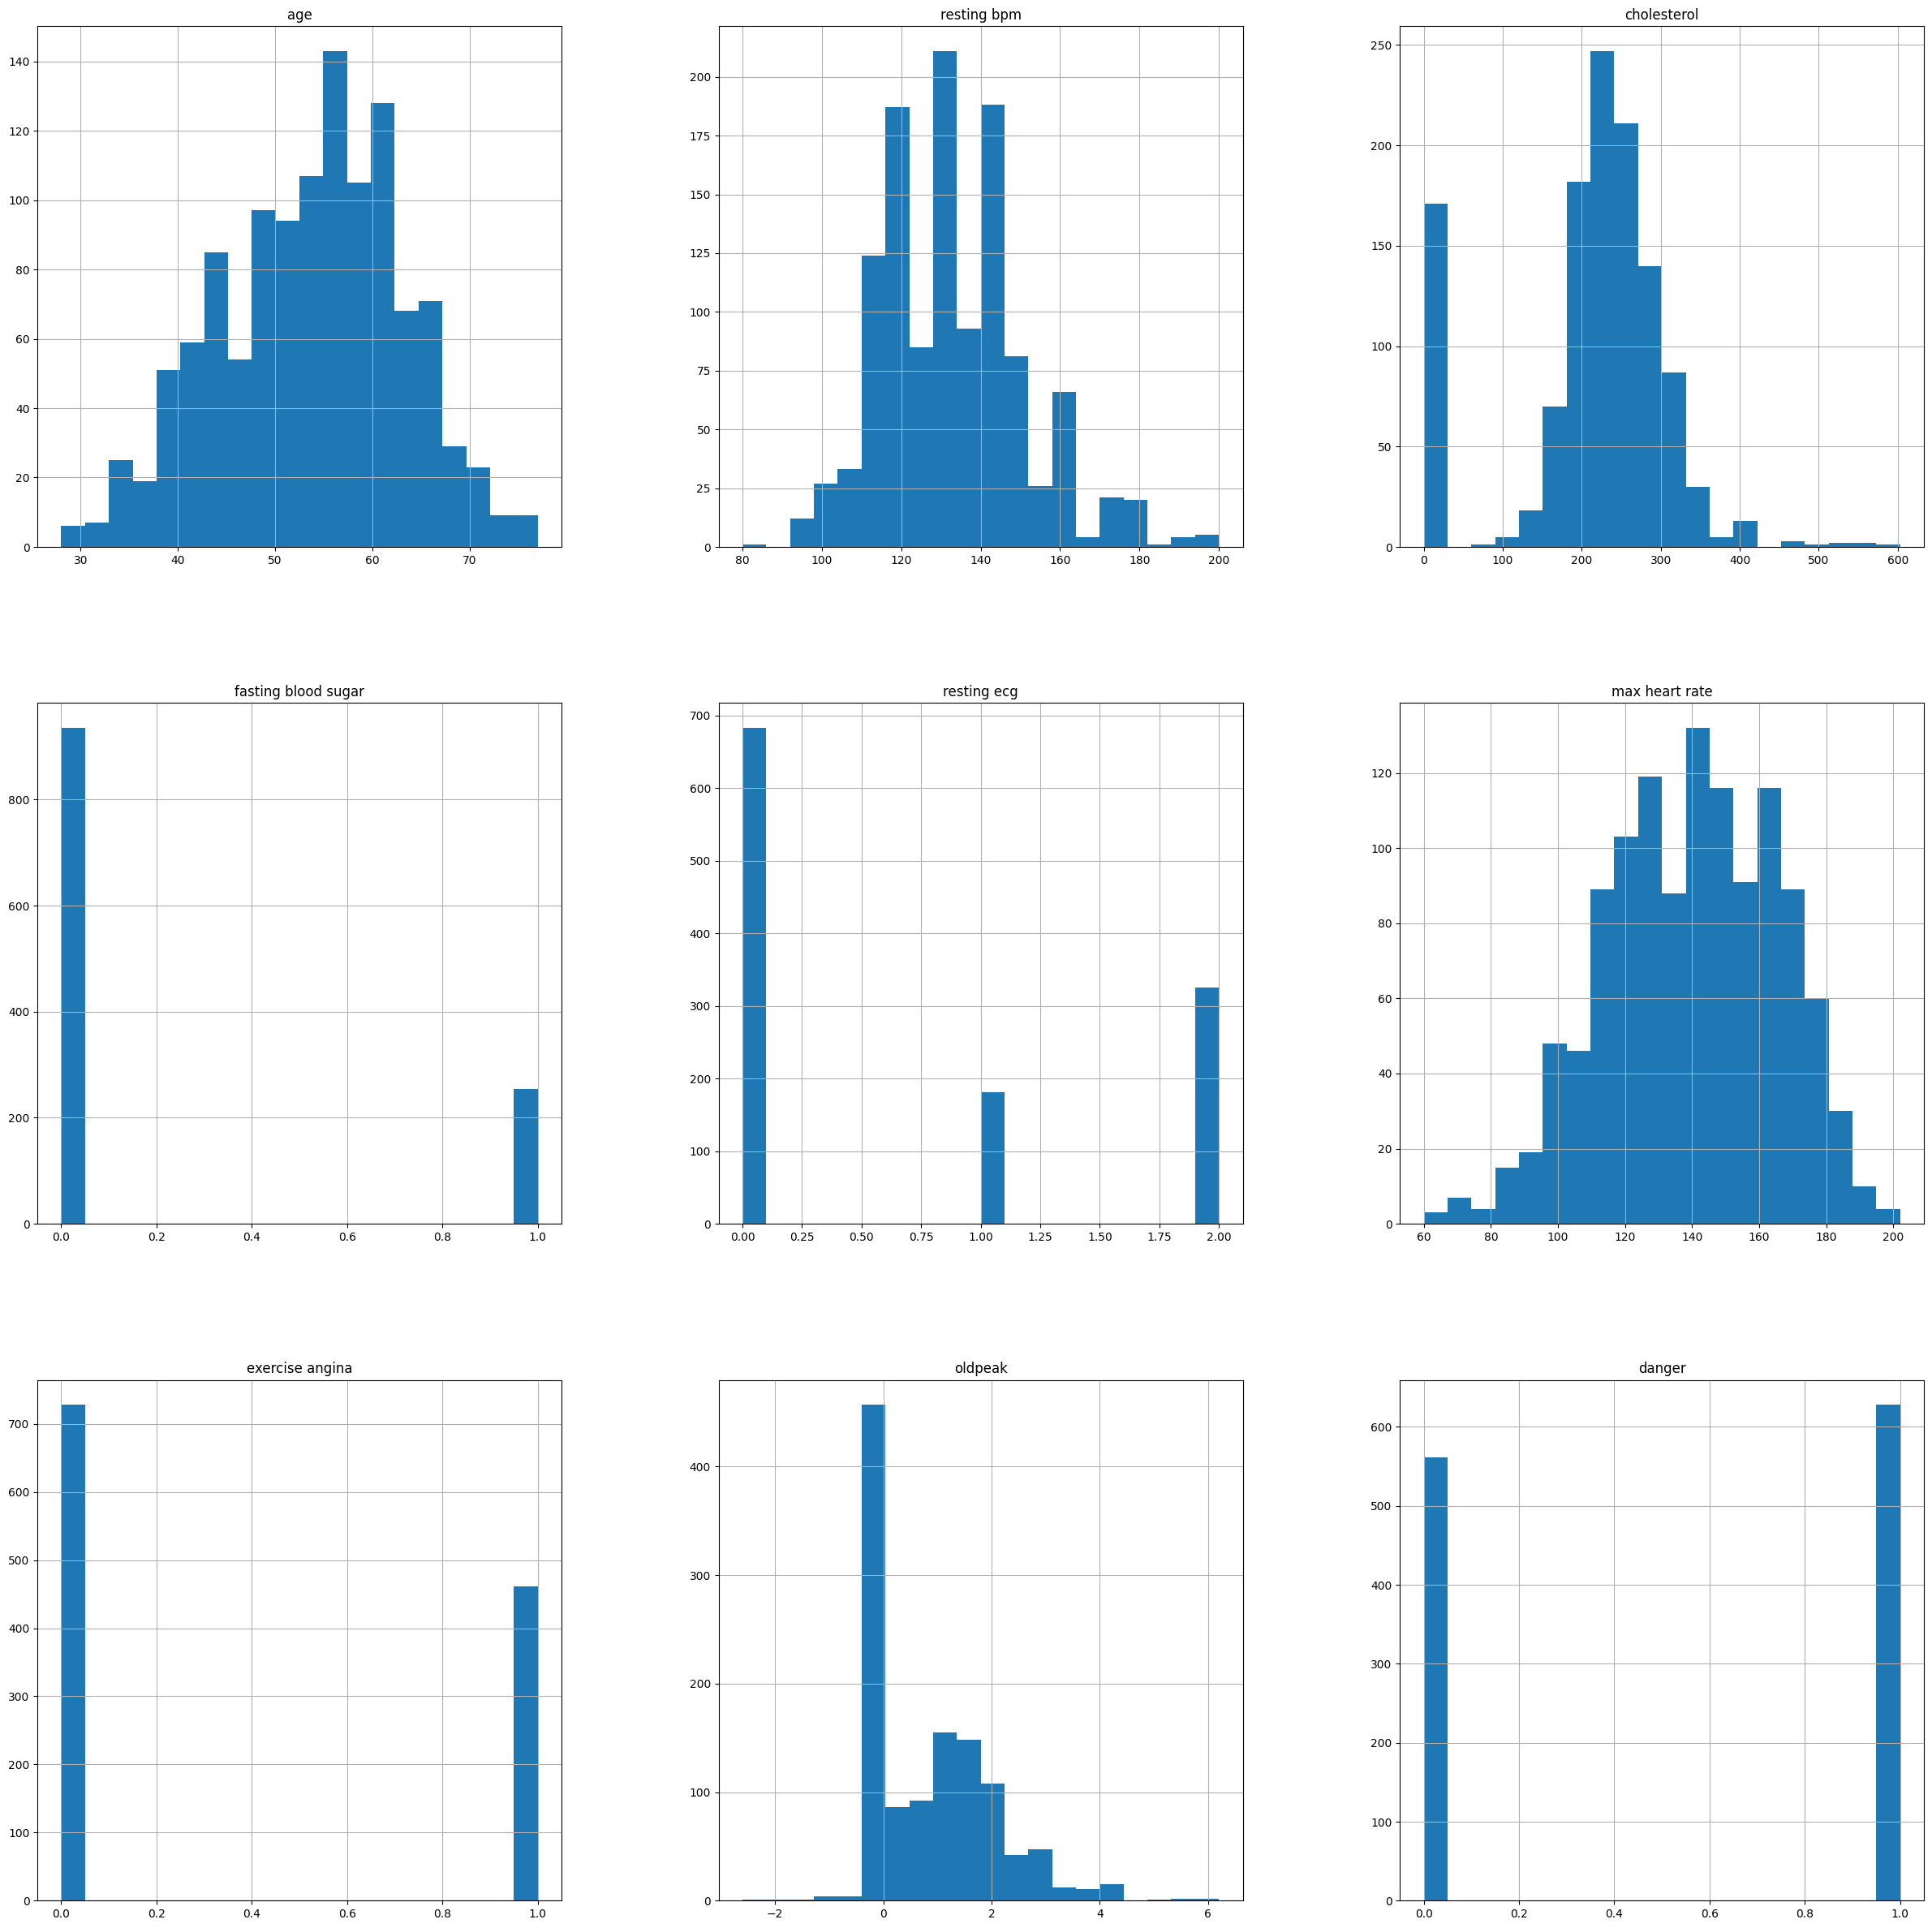

In [322]:
dataset.hist( bins = 20 , figsize = (30,30))

<AxesSubplot: >

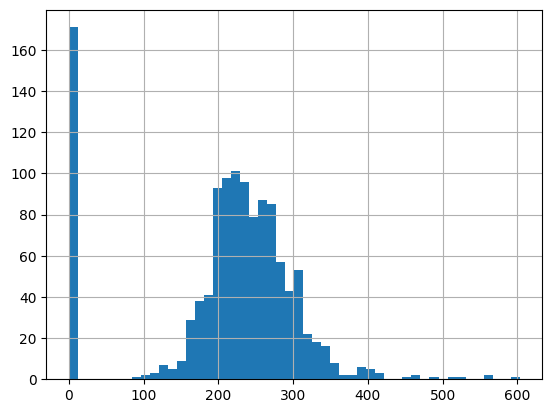

In [323]:
dataset["cholesterol"].hist(bins=50)

In [324]:
dataset.drop( dataset[ dataset['cholesterol'] == 0 ].index , inplace = True )

In [325]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   resting bpm          1018 non-null   int64  
 2   cholesterol          1018 non-null   int64  
 3   fasting blood sugar  1018 non-null   int64  
 4   resting ecg          1018 non-null   int64  
 5   max heart rate       1018 non-null   int64  
 6   exercise angina      1018 non-null   int64  
 7   oldpeak              1018 non-null   float64
 8   danger               1018 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 79.5 KB


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'resting bpm'}>,
        <AxesSubplot: title={'center': 'cholesterol'}>],
       [<AxesSubplot: title={'center': 'fasting blood sugar'}>,
        <AxesSubplot: title={'center': 'resting ecg'}>,
        <AxesSubplot: title={'center': 'max heart rate'}>],
       [<AxesSubplot: title={'center': 'exercise angina'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'danger'}>]], dtype=object)

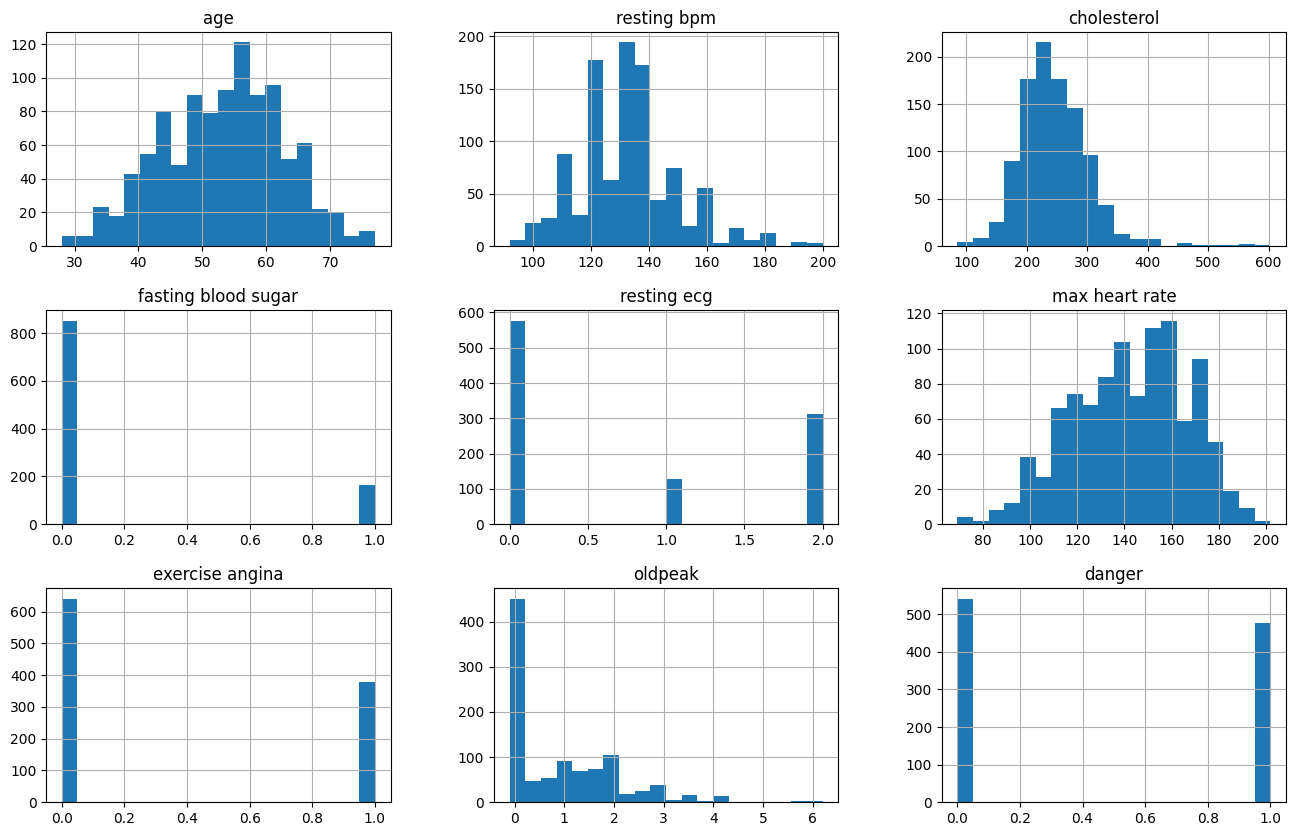

In [326]:
dataset.hist( bins = 20 , figsize=(16,10))

In [327]:

binary = ['sex' , 'fasting blood sugar' , 'exercise angina' ]
numerical = ['age' , 'resting bpm' , 'cholesterol', 'max heart rate', 'oldpeak' ]

In [328]:
dataset_original = dataset.copy()
dataset_original

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
0,40,140,289,0,0,172,0,0.0,0
1,49,160,180,0,0,156,0,1.0,1
2,37,130,283,0,1,98,0,0.0,0
3,48,138,214,0,0,108,1,1.5,1
4,54,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,0,132,0,1.2,1
1186,68,144,193,1,0,141,0,3.4,1
1187,57,130,131,0,0,115,1,1.2,1
1188,57,130,236,0,2,174,0,0.0,1


In [329]:
dataset

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
0,40,140,289,0,0,172,0,0.0,0
1,49,160,180,0,0,156,0,1.0,1
2,37,130,283,0,1,98,0,0.0,0
3,48,138,214,0,0,108,1,1.5,1
4,54,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,0,132,0,1.2,1
1186,68,144,193,1,0,141,0,3.4,1
1187,57,130,131,0,0,115,1,1.2,1
1188,57,130,236,0,2,174,0,0.0,1


In [330]:
# Examining correlation between features
corr_matrix = dataset.corr()
corr_matrix["danger"].sort_values(ascending=False)


danger                 1.000000
exercise angina        0.519148
oldpeak                0.470201
age                    0.274112
resting bpm            0.171239
resting ecg            0.126441
fasting blood sugar    0.115842
cholesterol            0.105813
max heart rate        -0.387733
Name: danger, dtype: float64

**Scaling the dataset**

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform( dataset[numerical] )
scaled_features.shape

(1018, 5)

**Standardization**

In [333]:
for i,j in zip(numerical , range(scaled_features.shape[1] ) ):
  dataset[i] = scaled_features[:,j]
dataset

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
0,-1.412704,0.425872,0.753163,0,0,1.194669,0,-0.859178,0
1,-0.456357,1.572492,-1.151883,0,0,0.541603,0,0.055625,1
2,-1.731486,-0.147439,0.648298,0,1,-1.825764,0,-0.859178,0
3,-0.562618,0.311210,-0.557648,0,0,-1.417597,1,0.513026,1
4,0.074946,0.999182,-0.889721,0,0,-0.846164,0,-0.859178,0
...,...,...,...,...,...,...,...,...,...
1185,-0.881400,-1.294059,0.316226,0,0,-0.437997,0,0.238586,1
1186,1.562596,0.655196,-0.924676,1,0,-0.070647,0,2.251152,1
1187,0.393728,-0.147439,-2.008280,0,0,-1.131881,1,0.238586,1
1188,0.393728,-0.147439,-0.173144,0,2,1.276303,0,-0.859178,1


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'resting bpm'}>,
        <AxesSubplot: title={'center': 'cholesterol'}>],
       [<AxesSubplot: title={'center': 'fasting blood sugar'}>,
        <AxesSubplot: title={'center': 'resting ecg'}>,
        <AxesSubplot: title={'center': 'max heart rate'}>],
       [<AxesSubplot: title={'center': 'exercise angina'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'danger'}>]], dtype=object)

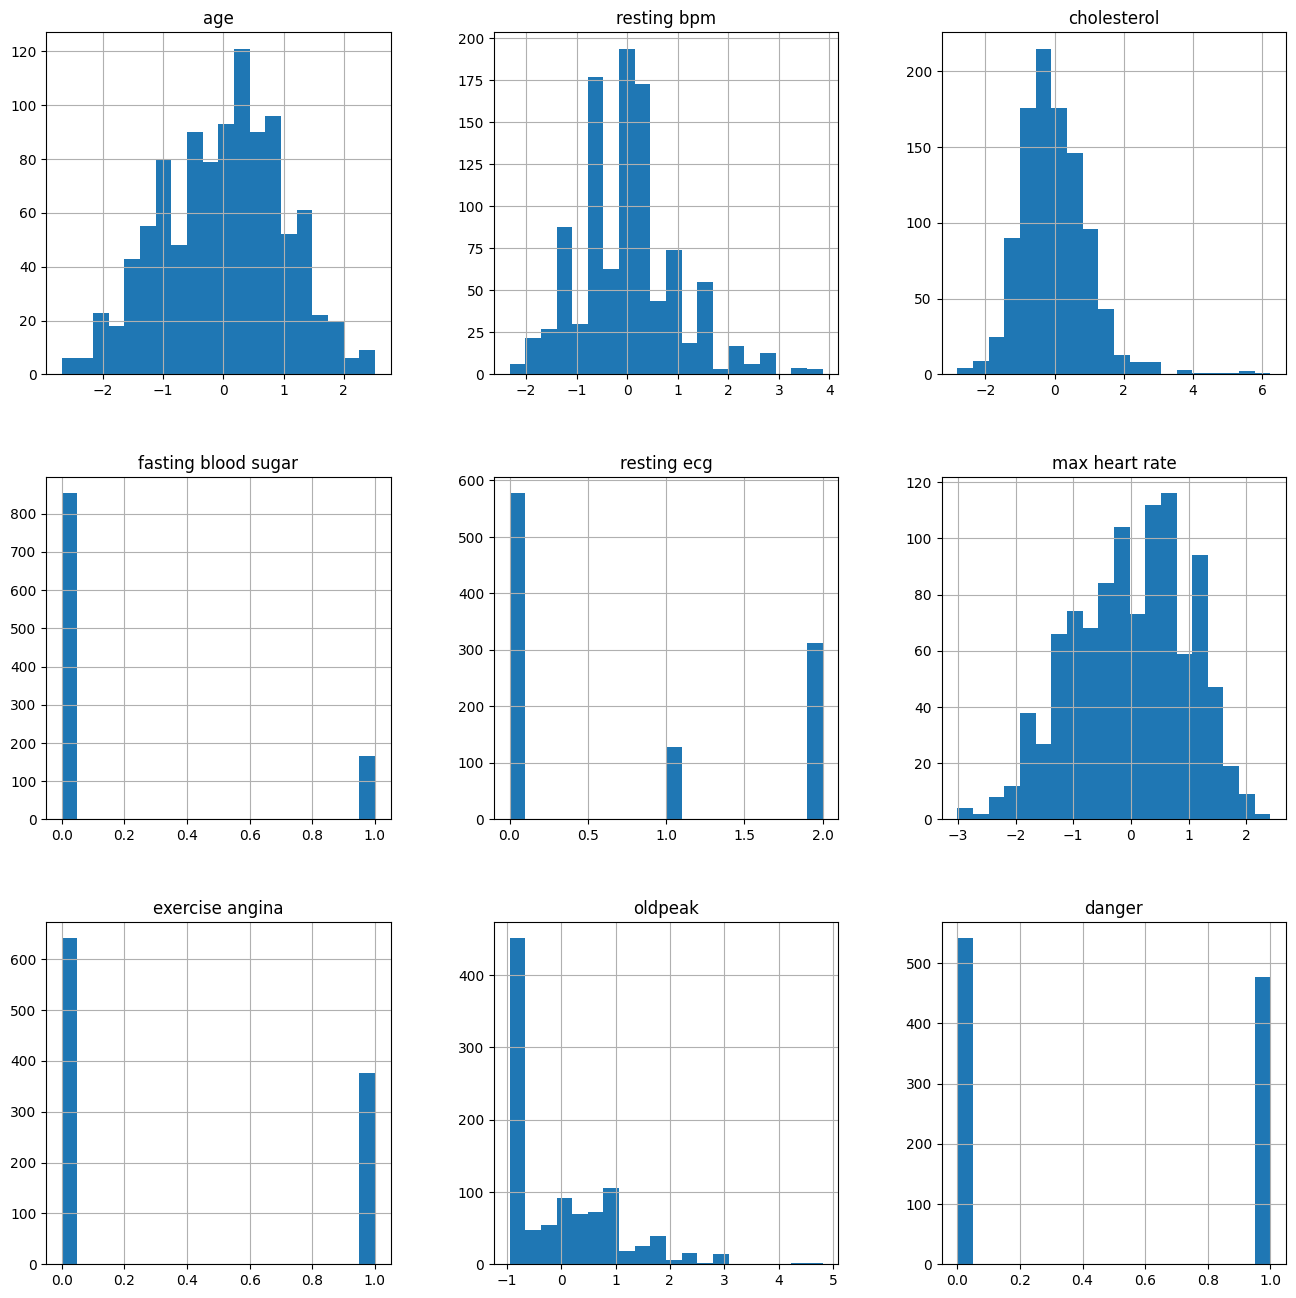

In [334]:
dataset.hist( bins = 20 , figsize=(16,16))

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
x = dataset.drop( columns=['danger'], axis=1) 
y = dataset['danger']

In [337]:
x

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak
0,-1.412704,0.425872,0.753163,0,0,1.194669,0,-0.859178
1,-0.456357,1.572492,-1.151883,0,0,0.541603,0,0.055625
2,-1.731486,-0.147439,0.648298,0,1,-1.825764,0,-0.859178
3,-0.562618,0.311210,-0.557648,0,0,-1.417597,1,0.513026
4,0.074946,0.999182,-0.889721,0,0,-0.846164,0,-0.859178
...,...,...,...,...,...,...,...,...
1185,-0.881400,-1.294059,0.316226,0,0,-0.437997,0,0.238586
1186,1.562596,0.655196,-0.924676,1,0,-0.070647,0,2.251152
1187,0.393728,-0.147439,-2.008280,0,0,-1.131881,1,0.238586
1188,0.393728,-0.147439,-0.173144,0,2,1.276303,0,-0.859178


In [338]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: danger, Length: 1018, dtype: int64

In [339]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , stratify=y , random_state=42 )

**Data size limitations :**

In [340]:
x_train.shape

(814, 8)

In [341]:
x_test.shape

(204, 8)

**Logistic Regression Model Implementation**

In [342]:
from sklearn.linear_model import LogisticRegression

In [343]:
from sklearn.model_selection import GridSearchCV

In [344]:
model = LogisticRegression()

In [345]:
grid= { "C": np.logspace(-2 , 2) , "solver" : [ "liblinear" , "saga" ] , "penalty":["l1","l2"] }
model_grid_cv = GridSearchCV( model , grid , cv=4 , scoring = 'accuracy' , return_train_score= True )

In [346]:
from warnings import filterwarnings
filterwarnings('ignore')
model_grid_cv.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.947051...
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [347]:
print(" Best model characteristics : ")
print(" Best estimator : ", model_grid_cv.best_estimator_ )
print(" Best score : ", model_grid_cv.best_score_ )
print(" Best params : ", model_grid_cv.best_params_ )

 Best model characteristics : 
 Best estimator :  LogisticRegression(C=0.517947467923121, penalty='l1', solver='saga')
 Best score :  0.8083285038153192
 Best params :  {'C': 0.517947467923121, 'penalty': 'l1', 'solver': 'saga'}


In [348]:
for i,j in zip( model_grid_cv.cv_results_['mean_test_score'] , model_grid_cv.cv_results_['params'] ) :
  if( i>0.845 ):
    print(" The model scored : {} using the params : {} ".format(i,j) )
    print('----------------------------------------------------------------------------') 

In [349]:
from sklearn.model_selection import cross_val_score
logistic_classifier = model_grid_cv.best_estimator_
scores = cross_val_score(logistic_classifier , x_train , y_train , scoring='accuracy' , cv = 4 )

In [350]:
scores

array([0.83823529, 0.79901961, 0.78817734, 0.80788177])

In [351]:
y_predict = logistic_classifier.predict(x_test)

**Measuring a model's performance**

In [352]:
from sklearn.metrics import accuracy_score

In [353]:
accuracy = accuracy_score( y_test , y_predict )
print("The model's accuracy = %.3f" % accuracy)

The model's accuracy = 0.760


In [354]:
from sklearn.metrics import confusion_matrix

In [386]:
matrix = confusion_matrix( y_test , y_predict )
matrix

array([[97, 11],
       [20, 76]])

In [357]:
[tn, fp] ,  [fn, tp] = matrix

In [358]:
recall = tp / ( tp + fn )
print("Model's recall = %.3f " % recall)

Model's recall = 0.656 


PPL

In [359]:
from warnings import filterwarnings
filterwarnings('ignore')
def logistic_regressio_model(x,y, numerical):
  #-------------------------------
  # Importing modules
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import sklearn
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  #-------------------------------
  # Standardization the numerical features
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform( x[numerical] )
  for i,j in zip(numerical , range(scaled_features.shape[1] ) ):
    x[i] = scaled_features[:,j]
  #-------------------------------
  # Splitting the dataset
  x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , stratify=y , random_state=42 )
  #-------------------------------
  # Instanciating a model
  model = LogisticRegression()
  #-------------------------------
  # Defining the grid search
  grid= { "C": np.logspace(-2 , 2) , "solver" : [ "liblinear" , "saga" ] , "penalty":["l1","l2"] }
  #-------------------------------
  # Fitting the grid search to the dataset
  model_grid_cv = GridSearchCV( model , grid , cv=4 , scoring = 'accuracy' , return_train_score= True )
  model_grid_cv.fit(x_train, y_train)
  #-------------------------------
  # Displaying the most efficient model characteristics
  print(" Best model characteristics : ")
  print("     Best estimator : ", model_grid_cv.best_estimator_ )
  print("     Best score : ", model_grid_cv.best_score_ )
  print("     Best params : ", model_grid_cv.best_params_ )
  print('  ------------------------------------------------')
  #-------------------------------
  # Using the best model ( estimator )
  logistic_classifier = model_grid_cv.best_estimator_
  #-------------------------------
  # Applying a cross validation scoring
  scores = cross_val_score(logistic_classifier , x_train , y_train , scoring='accuracy' , cv = 4 )
  print("  Evaluating the final model : ")
  print("      Cross validation scores = ", scores)
  #-------------------------------
  # Making a real estimation on our model's performance on the test set
  y_predict = logistic_classifier.predict(x_test)
  #-------------------------------
  # Accuracy evaluation
  accuracy = accuracy_score( y_test , y_predict )
  print("      The model's accuracy = %.3f" % accuracy)
  #-------------------------------
  # Evaluation using a confusion matrix
  matrix = confusion_matrix( y_test , y_predict )
  [tn, fp] ,  [fn, tp ] = matrix
  recall = tp / ( tp + fn )
  print("      Model's recall = %.3f " % recall)
  #-------------------------------
  return [ logistic_classifier, recall ]

**Let's do more experiments**

Model history

In [360]:
model_history = []
model_history.append( [x, logistic_classifier, float('%.3f' % recall) ] )
model_history[0][2]

0.656

In [361]:
x_new = dataset_original.copy().drop( columns=['danger'] )
y_new = y

In [362]:
x_new

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak
0,40,140,289,0,0,172,0,0.0
1,49,160,180,0,0,156,0,1.0
2,37,130,283,0,1,98,0,0.0
3,48,138,214,0,0,108,1,1.5
4,54,150,195,0,0,122,0,0.0
...,...,...,...,...,...,...,...,...
1185,45,110,264,0,0,132,0,1.2
1186,68,144,193,1,0,141,0,3.4
1187,57,130,131,0,0,115,1,1.2
1188,57,130,236,0,2,174,0,0.0


In [363]:
[ model_new, recall ] = logistic_regressio_model(x_new ,y_new, numerical)

 Best model characteristics : 
     Best estimator :  LogisticRegression(C=0.517947467923121, penalty='l1', solver='saga')
     Best score :  0.8083285038153192
     Best params :  {'C': 0.517947467923121, 'penalty': 'l1', 'solver': 'saga'}
  ------------------------------------------------
  Evaluating the final model : 
      Cross validation scores =  [0.83823529 0.79901961 0.78817734 0.80788177]
      The model's accuracy = 0.760
      Model's recall = 0.656 


**Saving the model**

In [364]:
model_history.append( [ x_new, model_new, recall ] )

In [365]:
x_final = dataset_original.copy()

In [366]:
x_final.corr()['danger']

age                    0.274112
resting bpm            0.171239
cholesterol            0.105813
fasting blood sugar    0.115842
resting ecg            0.126441
max heart rate        -0.387733
exercise angina        0.519148
oldpeak                0.470201
danger                 1.000000
Name: danger, dtype: float64

In [367]:
x_final.corr()

,age,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,danger
age,1.000000,0.259836,0.098634,0.209705,0.209592,-0.368447,0.205113,0.263868,0.274112
resting bpm,0.259836,1.000000,0.112951,0.169577,0.070335,-0.110420,0.143969,0.202187,0.171239
cholesterol,0.098634,0.112951,1.000000,0.046838,0.100036,-0.012663,0.082348,0.053640,0.105813
fasting blood sugar,0.209705,0.169577,0.046838,1.000000,0.103228,-0.074700,0.082218,0.032999,0.115842
resting ecg,0.209592,0.070335,0.100036,0.103228,1.000000,0.027848,0.051557,0.132590,0.126441
max heart rate,-0.368447,-0.110420,-0.012663,-0.074700,0.027848,1.000000,-0.395850,-0.267506,-0.387733
exercise angina,0.205113,0.143969,0.082348,0.082218,0.051557,-0.395850,1.000000,0.407772,0.519148
oldpeak,0.263868,0.202187,0.053640,0.032999,0.132590,-0.267506,0.407772,1.000000,0.470201
danger,0.274112,0.171239,0.105813,0.115842,0.126441,-0.387733,0.519148,0.470201,1.000000


In [368]:
x_final.drop( columns = ['cholesterol', 'danger'] , inplace=True )

In [369]:
numerical_update = numerical.copy()
numerical_update.remove('cholesterol')
numerical_update

['age', 'resting bpm', 'max heart rate', 'oldpeak']

In [370]:
[ model_final, recall ] = logistic_regressio_model(x_final ,y_new, numerical_update)

 Best model characteristics : 
     Best estimator :  LogisticRegression(C=0.9102981779915218, penalty='l1', solver='saga')
     Best score :  0.8144801023857818
     Best params :  {'C': 0.9102981779915218, 'penalty': 'l1', 'solver': 'saga'}
  ------------------------------------------------
  Evaluating the final model : 
      Cross validation scores =  [0.84313725 0.79901961 0.80295567 0.81280788]
      The model's accuracy = 0.755
      Model's recall = 0.656 


In [371]:
model_history.append( [ x_final, model_final, recall ] )

In [372]:
from sklearn.tree import DecisionTreeClassifier

In [373]:
dtc = DecisionTreeClassifier()

In [374]:
dtc.fit(x_train, y_train)
y_predict = dtc.predict(x_test)
accuracy = accuracy_score( y_test , y_predict )

accuracy

0.8431372549019608

In [375]:
from sklearn.ensemble import RandomForestClassifier

In [376]:
rfc = RandomForestClassifier()


In [377]:
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
accuracy = accuracy_score( y_test , y_predict )

accuracy

0.8774509803921569